In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
# Load the image using PIL
image_before = Image.open(r"C:\Users\Asad\Images\bf.png")

image_after = Image.open(r"C:\Users\Asad\Images\af.png")
# Convert the image to grayscale
image_before_gs = image_before.convert("L")
image_after_gs = image_after.convert("L")

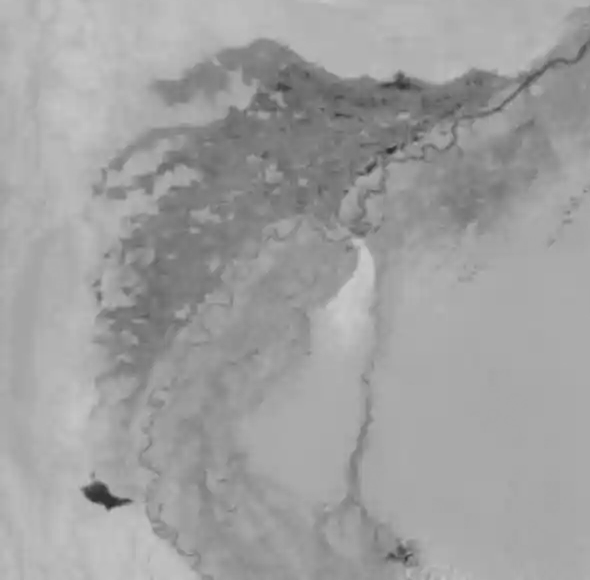

In [64]:
image_before_gs

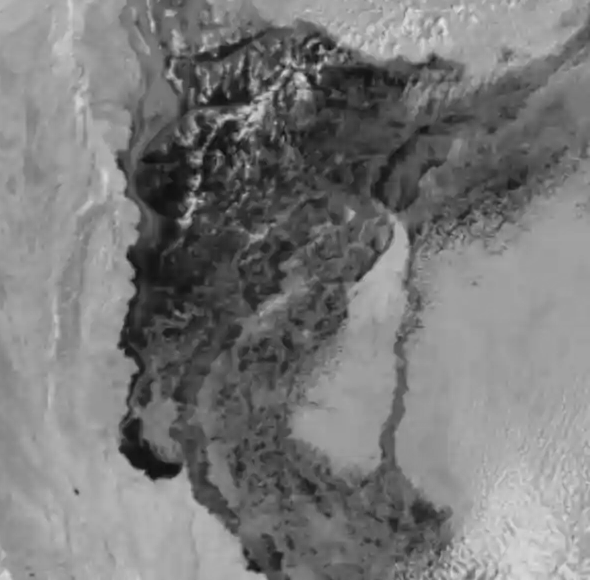

In [65]:
image_after_gs

In [66]:
# COnvert PIL image to numpy array (before)
image_before_np = np.array(image_before_gs)
image_before_1d = image_before_np.reshape(-1,1)

In [67]:
# COnvert PIL image to numpy array (after)
image_after_np = np.array(image_after_gs)
image_after_1d = image_after_np.reshape(-1,1)

In [76]:
# K-mean Clustering 
n_clusters= 3 #Clusters
kmean = KMeans(n_clusters)
cluster_assignments = kmean.fit_predict(image_after_1d)

C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
# reshape the cluster 
clustered_image=cluster_assignments.reshape(image_after_np.shape)

In [81]:
clustered_image.shape

(580, 590)

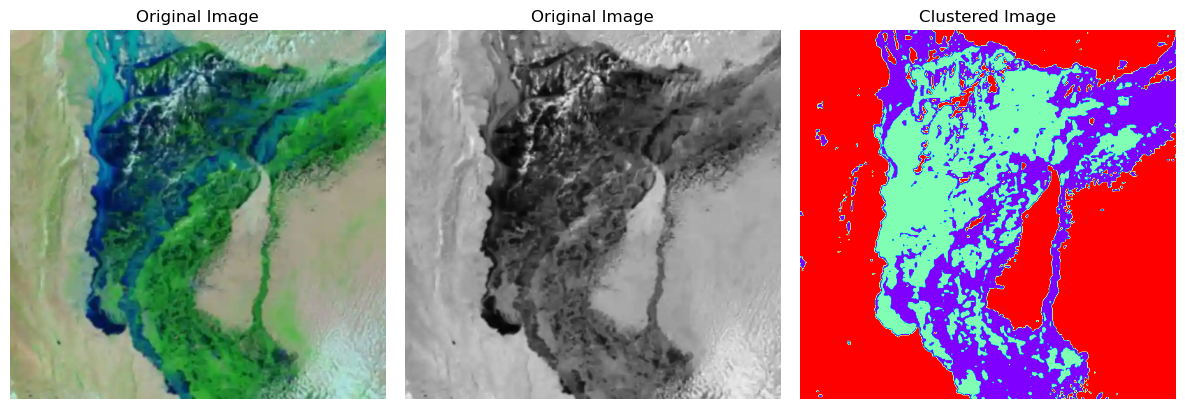

In [82]:
# plotting
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image_after, cmap= 'rainbow')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(image_after_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(clustered_image, cmap= 'rainbow')
plt.title('Clustered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [60]:
masks = []
for cluster_id in range(n_clusters):
    cluster_mask = (cluster_assignments == cluster_id).reshape(image_after_np.shape[:2])
    masks.append(cluster_mask)

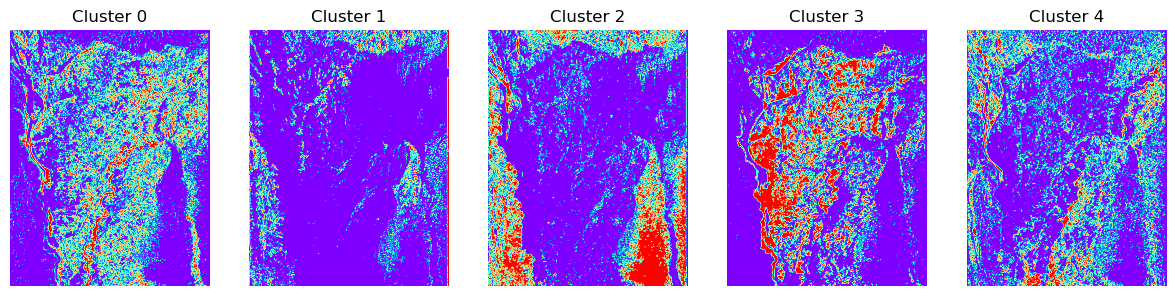

In [62]:
plt.figure(figsize=(18, 12))
for i in range(n_clusters):
    plt.subplot(1, n_clusters+1, i+2)
    plt.imshow(masks[i], cmap='rainbow')
    plt.title(f'Cluster {i}')
    plt.axis('off')

In [32]:
final_image=image_after_np * masks[3]

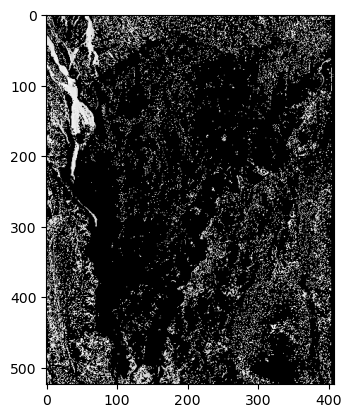

In [36]:
plt.imshow(final_image, cmap='gray')

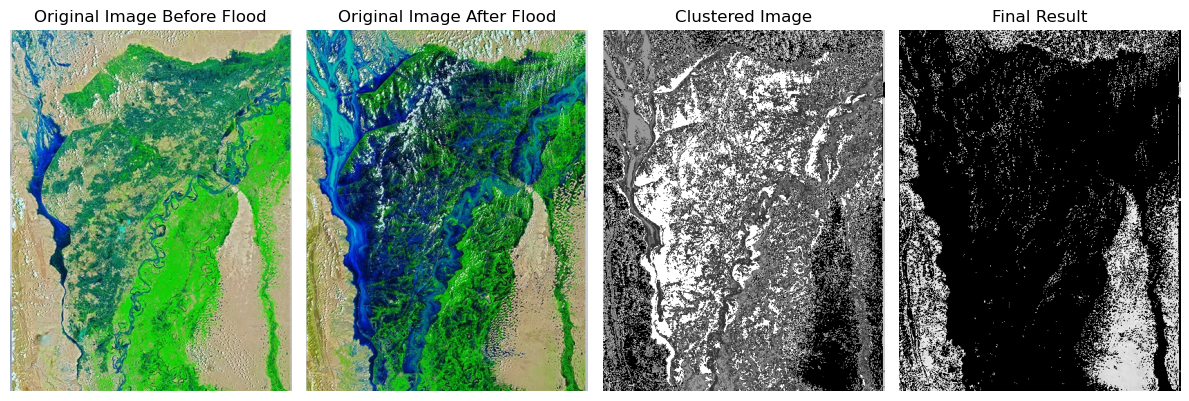

In [30]:
# plotting
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(image_before)
plt.title('Original Image Before Flood')
plt.axis('off')

plt.subplot(142)
plt.imshow(image_after)
plt.title('Original Image After Flood')
plt.axis('off')

plt.subplot(143)
plt.imshow(clustered_image, cmap= 'gray')
plt.title('Clustered Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(final_image, cmap= 'gray')
plt.title('Final Result')
plt.axis('off')

plt.tight_layout()
plt.show()